In [1]:
import keras
import tensorflow as tf
#ponizsze komendy pozwalają uruchomić obliczenia na lokalnym gpu
#config = tf.compat.v1.ConfigProto()
#config.gpu_options.allow_growth = True 
#config.log_device_placement = True 
#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)

Wprowadzenie do konwolucyjnych sieci neuronowych

https://www.youtube.com/watch?v=FmpDIaiMIeA

Poniższy kod przedstawia wygląd podstawowej sieci konwolucyjnej. Jest ona stosem warstw Conv2D (https://keras.io/layers/convolutional/) i MaxPooling2D (https://keras.io/layers/pooling/).

Sieć neuronowa przyjmuje tensor o kształcie określanym przez wysokość obrazu, jego szerokość i kanały obrazu.

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(..., ..., ...), padding = 'valid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Wyświetlmy aktualną architekturę sieci:

In [ ]:
model.summary()

Na wyjściu każdej warstwy Conv2D i MaxPooling2D pojawia się trójwymiarowy tensor o kształcie (wysokość, szerokość, kanały). Wraz z zagłębianiem się w sieci wysokość i szerokość mają tendencję do przyjmowania mniejszych wartości. Liczbę kanałów określa pierwszy argument przekazany do warstw Conv2D (możemy mieć np. 32 lub 64 kanały).

Kolejnym krokiem jest przekazanie ostatniego tensora wyjściowego o kształcie (3, 3, 64) do klasyfikatora w postaci sieci gęstej— stosu warstw Dense. Klasyfikatory te przetwarzają jednowymiarowe wektory, a nasze dane mają postać trójwymiarowego tensora. W związku z tym musimy spłaszczyć nasze dane wyjściowe, a następnie dodać kilka górnych warstw Dense:


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation= 'softmax'))

W ten sposób przygotowaną sieć należy skompilować i uruchomić trenowanie w znany już Wam spsosób

__Ćwiczenie__: wytrenuj powyższą sieć konwolucyjną na trzech zbiorach danych: MNIST, fashion MNIST orac cifar10.
Dla którego zbioru dokłądność jest najwyższa?

<h1>MNIST</h1>

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train / 255.
X_test = X_test / 255.

y_train = keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')
y_test = keras.utils.to_categorical(y_test,num_classes=10,dtype='float32')

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding = 'valid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation= 'softmax'))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

In [5]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [6]:
history = model.fit(X_train,y_train, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 12s 9ms/step - loss: 0.1428 - acc: 0.7778 - val_loss: 0.0621 - val_acc: 0.9160
Epoch 2/30
1313/1313 [==============================] - 12s 9ms/step - loss: 0.0473 - acc: 0.9355 - val_loss: 0.0358 - val_acc: 0.9514
Epoch 3/30
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0308 - acc: 0.9593 - val_loss: 0.0276 - val_acc: 0.9640
Epoch 4/30
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0234 - acc: 0.9685 - val_loss: 0.0250 - val_acc: 0.9671
Epoch 5/30
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0192 - acc: 0.9740 - val_loss: 0.0195 - val_acc: 0.9743
Epoch 6/30
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0165 - acc: 0.9780 - val_loss: 0.0177 - val_acc: 0.9769
Epoch 7/30
1313/1313 [==============================] - 14s 10ms/step - loss: 0.0145 - acc: 0.9808 - val_loss: 0.0157 - val_acc: 0.9791
Epoch 8/30
1313/1313 [============================

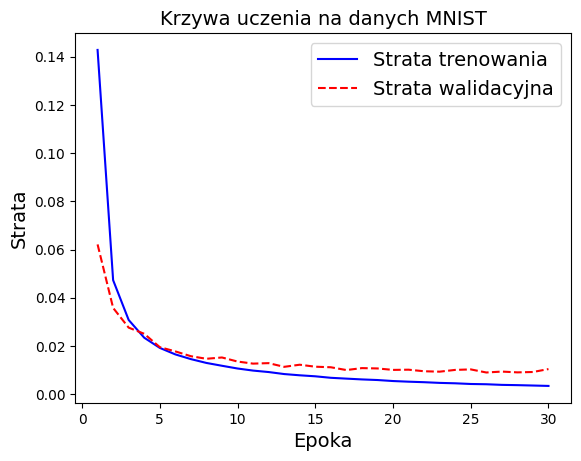

In [8]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs,loss, 'b-', label="Strata trenowania")
plt.plot(epochs, val_loss, 'r--', label="Strata walidacyjna")
plt.title("Krzywa uczenia na danych MNIST")
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.legend()

plt.show()

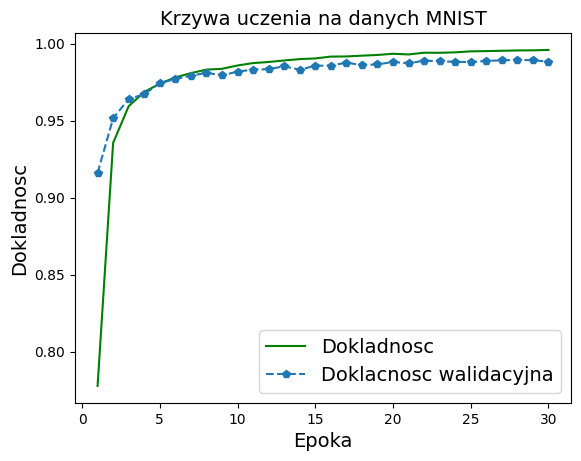

In [9]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

acc = history.history['acc']
val_acc = history.history['val_acc']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g-', label="Dokladnosc")
plt.plot(epochs, val_acc, 'p--', label="Doklacnosc walidacyjna")

plt.title("Krzywa uczenia na danych MNIST")
plt.xlabel("Epoka")
plt.ylabel("Dokladnosc")
plt.legend()

plt.show()

<h1>FASHION MNIST</h1>

In [10]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X_train = X_train / 255.
X_test = X_test / 255.

y_train = keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')
y_test = keras.utils.to_categorical(y_test,num_classes=10,dtype='float32')

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding = 'valid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation= 'softmax'))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 5574

In [13]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [14]:
history = model.fit(X_train,y_train, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 16s 12ms/step - loss: 0.1781 - acc: 0.6402 - val_loss: 0.1187 - val_acc: 0.7529
Epoch 2/30
1313/1313 [==============================] - 15s 11ms/step - loss: 0.1083 - acc: 0.7756 - val_loss: 0.1032 - val_acc: 0.7899
Epoch 3/30
1313/1313 [==============================] - 15s 11ms/step - loss: 0.0959 - acc: 0.8047 - val_loss: 0.0949 - val_acc: 0.8073
Epoch 4/30
1313/1313 [==============================] - 14s 10ms/step - loss: 0.0879 - acc: 0.8224 - val_loss: 0.0864 - val_acc: 0.8276
Epoch 5/30
1313/1313 [==============================] - 14s 11ms/step - loss: 0.0821 - acc: 0.8355 - val_loss: 0.0804 - val_acc: 0.8404
Epoch 6/30
1313/1313 [==============================] - 14s 11ms/step - loss: 0.0774 - acc: 0.8464 - val_loss: 0.0772 - val_acc: 0.8454
Epoch 7/30
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0736 - acc: 0.8543 - val_loss: 0.0752 - val_acc: 0.8517
Epoch 8/30
1313/1313 [==========================

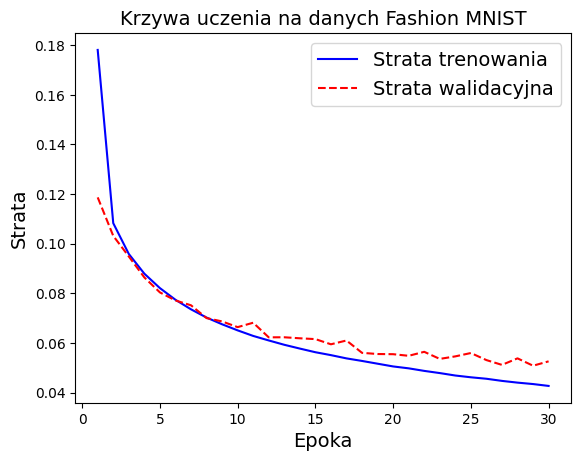

In [15]:
import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)



loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs,loss, 'b-', label="Strata trenowania")
plt.plot(epochs, val_loss, 'r--', label="Strata walidacyjna")
plt.title("Krzywa uczenia na danych Fashion MNIST")
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.legend()

plt.show()

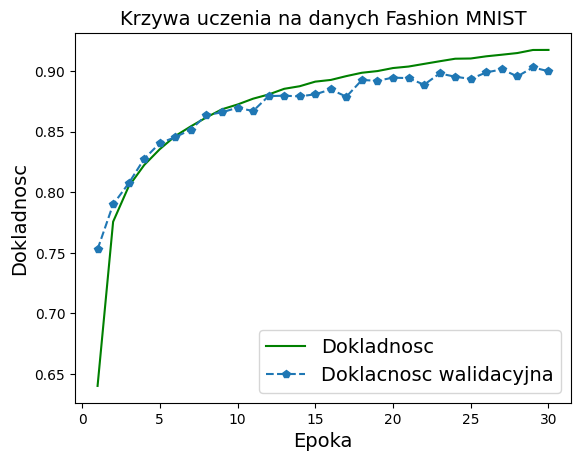

In [16]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

acc = history.history['acc']
val_acc = history.history['val_acc']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g-', label="Dokladnosc")
plt.plot(epochs, val_acc, 'p--', label="Doklacnosc walidacyjna")

plt.title("Krzywa uczenia na danych Fashion MNIST")
plt.xlabel("Epoka")
plt.ylabel("Dokladnosc")
plt.legend()

plt.show()

<h1>CIFAR-10</h1>

In [17]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

X_train = X_train / 255.
X_test = X_test / 255.

y_train = keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')
y_test = keras.utils.to_categorical(y_test,num_classes=10,dtype='float32')

In [18]:
X_train.shape

(50000, 32, 32, 3)

In [19]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding = 'valid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation= 'softmax'))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [20]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [21]:
history = model.fit(X_train,y_train, epochs=30, validation_split=0.3)

Epoch 1/30
1094/1094 [==============================] - 13s 11ms/step - loss: 0.3054 - acc: 0.2411 - val_loss: 0.2780 - val_acc: 0.3300
Epoch 2/30
1094/1094 [==============================] - 12s 11ms/step - loss: 0.2640 - acc: 0.3715 - val_loss: 0.2533 - val_acc: 0.4031
Epoch 3/30
1094/1094 [==============================] - 12s 11ms/step - loss: 0.2461 - acc: 0.4245 - val_loss: 0.2382 - val_acc: 0.4473
Epoch 4/30
1094/1094 [==============================] - 12s 11ms/step - loss: 0.2343 - acc: 0.4572 - val_loss: 0.2356 - val_acc: 0.4506
Epoch 5/30
1094/1094 [==============================] - 12s 11ms/step - loss: 0.2265 - acc: 0.4827 - val_loss: 0.2245 - val_acc: 0.4851
Epoch 6/30
1094/1094 [==============================] - 12s 11ms/step - loss: 0.2202 - acc: 0.5017 - val_loss: 0.2207 - val_acc: 0.4941
Epoch 7/30
1094/1094 [==============================] - 12s 11ms/step - loss: 0.2148 - acc: 0.5161 - val_loss: 0.2181 - val_acc: 0.5059
Epoch 8/30
1094/1094 [==========================

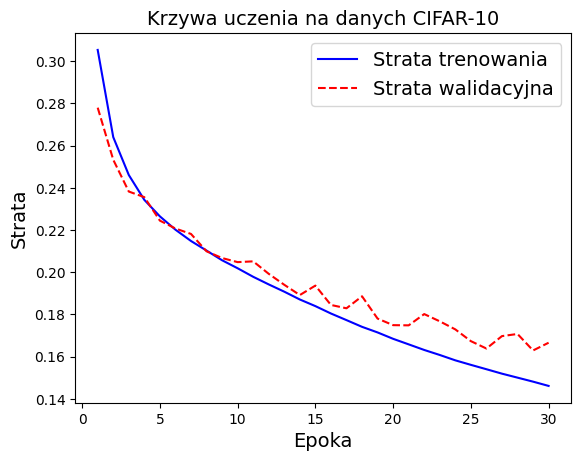

In [22]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs,loss, 'b-', label="Strata trenowania")
plt.plot(epochs, val_loss, 'r--', label="Strata walidacyjna")

plt.title("Krzywa uczenia na danych CIFAR-10")
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.legend()

plt.show()

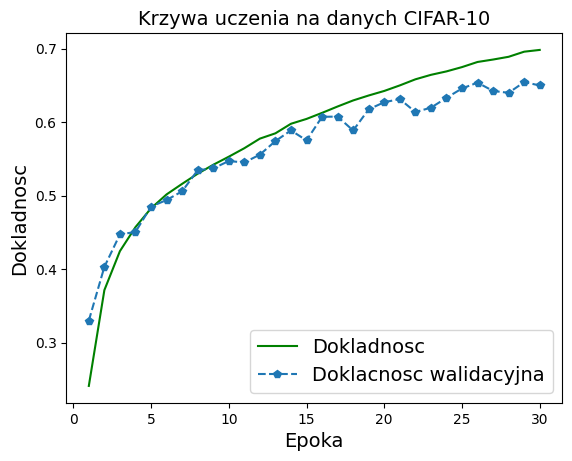

In [23]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

acc = history.history['acc']
val_acc = history.history['val_acc']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g-', label="Dokladnosc")
plt.plot(epochs, val_acc, 'p--', label="Doklacnosc walidacyjna")

plt.title("Krzywa uczenia na danych CIFAR-10")
plt.xlabel("Epoka")
plt.ylabel("Dokladnosc")
plt.legend()

plt.show()

<p>Najwyzsza dokladnosc model uzystal oczywiscie na danych MNIST osiagnac on dokladnosc walidacyjna na poziomie: 98,9% przy stracie wynoszacej: 0.01</p>
<p>Druga najwyzsza dokladnosc model uzyskal na danych Fashion MNIST. Dokladnosc w tym przypadku wynosila: 90% przy stracie rownej: 0.05 </p>
<p>Bez wiekszych zaskoczen model najgorzej poradzial sobie z modelem CIFAR-10. Dokladnosc w przypadku tego modelu wyniosla: 65% przy stracie rownej: 0.16</p>